# Dimension reduction and Clustering

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import glob #Used to read all present files
pd.set_option('display.max_rows', 1000)

In [2]:
all_data = pd.DataFrame()
for f in glob.glob("data/*_fixed.xlsx"):
    print(f)
    df = pd.read_excel(f, skiprows = range(0, 1))
    all_data = all_data.append(df,ignore_index=True,sort=True)
# all_data.describe()
# Drop all columns that have missing values

# print(all_data.columns[all_data.isna()].tolist())
for f in all_data.columns[all_data.isna().any()].tolist():
    # working on set NaN to average of column
    for n in all_data[all_data[f].isnull()]:
        print(n)
#     all_data = all_data.drop(f, axis= 1) #Drop all NaN's
# print(all_data)

data\airport_line_airport_line_house_1_fixed.xlsx
data\hurondale_hurondale_house_1_fixed.xlsx
data\south_huron_south_huron_house_1_fixed.xlsx
data\wiedrick_poultry_wiedrick_poultry_house_1_fixed.xlsx
Animal age
Animal weight
Animal weight - Deviation
Animal weight - Growth per day
Animal weight - Normality
Animal weight - Uniformity
Average house temperature
Average inside RH
Average outside RH
Average outside temperature
Date
Feed conversion (FC)
Feed per animal
Number of animals
Water feed conversion (W:F)
Water per animal


           Date  Animal weight - Growth per day  Animal weight - Normality  \
0    2017-11-01                              68                       1047   
1    2017-11-02                              80                       1132   
2    2017-11-04                              80                       1302   
3    2017-11-05                              65                       1387   
4    2017-11-06                              98                       1473   
5    2017-11-07                              84                       1567   
6    2017-11-08                              92                       1662   
7    2017-11-09                              87                       1757   
8    2017-11-11                              73                       1947   
9    2017-11-12                              97                       2047   
10   2017-11-13                             120                       2147   
11   2017-11-21                              48                 

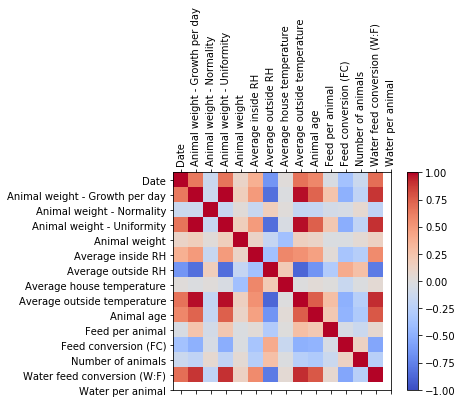

In [8]:
data=pd.read_excel("./data/airport_line_airport_line_house_1_fixed.xlsx", skiprows = range(0, 1))
# data2=pd.read_excel("./data/hunt_farm_hunt_farm_house_1_fontys_management_info_20171101_20191127_1574931146.xlsx", skiprows = range(0, 1))
# data3=pd.read_excel("./data/hurondale_hurondale_house_1_fontys_management_info_20171101_20191127_1574931146.xlsx", skiprows = range(0, 1))
# fixedData = data['data.feed_per_animal']
# data=pd.concat()
print(data)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [4]:
highCorr = corr[corr>0]
print(highCorr[highCorr<1].stack())
highCorr[highCorr<1].stack().to_csv("./data/correlation.csv")
highCorr[highCorr<1].stack().to_string("./data/correlation.txt")

Animal weight - Growth per day  Animal weight - Normality         0.642138
                                Animal weight                     0.666193
                                Average inside RH                 0.114976
                                Average outside RH                0.377129
                                Average outside temperature       0.019801
                                Animal age                        0.677228
                                Feed per animal                   0.583720
                                Water per animal                  0.694253
Animal weight - Normality       Animal weight - Growth per day    0.642138
                                Animal weight                     0.994353
                                Average inside RH                 0.169874
                                Average outside RH                0.498029
                                Animal age                        0.981492
                         

c:\users\tempe\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# output = open("./data/correlation.txt","w+")
# output.write(highCorr[highCorr<1].stack())
# output.close()



In [6]:
# corr.stack().to_csv("./data/correlation.csv",encoding='utf-8-sig')

Linear Regression Inside Temp and Food per Animal

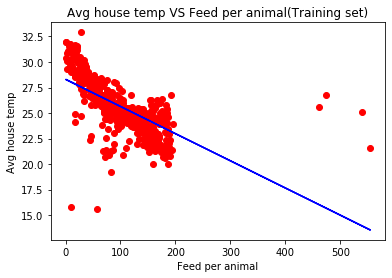

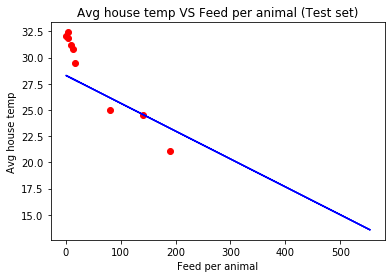

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
data=pd.read_excel("./data/airport_line_airport_line_house_1_fixed.xlsx", skiprows = range(0, 1))
y = data.iloc[:, 7].to_frame() # Average house temperature
X = data.iloc[:, 10].to_frame() # Feed per animal
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/50, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Avg house temp VS Feed per animal(Training set)')
viz_train.ylabel('Avg house temp')
viz_train.xlabel('Feed per animal')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Avg house temp VS Feed per animal (Test set)')
viz_test.ylabel('Avg house temp')
viz_test.xlabel('Feed per animal')
viz_test.show()

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)